In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model

img_width, img_height = 150, 150
model_path = './models/new_model3.h5'
model_weights_path = './models/new_weights3.h5'
model = load_model(model_path)
model.load_weights(model_weights_path)

Using TensorFlow backend.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 32)        18464     
__________

In [3]:
import numpy as np
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    './data/test/',
    target_size=(150,150),
    batch_size=32,
    shuffle=False)

#test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=2)
# Get most likely class


Found 216 images belonging to 6 classes.


In [4]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes


array([0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 0, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3,
       3, 4, 1, 3, 3, 0, 3, 4, 0, 1, 1, 3, 1, 5, 0, 1, 3, 1, 4, 3, 2, 1, 4,
       1, 0, 3, 1, 3, 3, 0, 3, 4, 2, 2, 2, 3, 2, 2, 0, 2, 4, 0, 2, 4, 2, 0,
       0, 0, 1, 2, 0, 0, 3, 2, 3, 3, 3, 1, 3, 5, 3, 2, 3, 2, 3, 2, 0, 3, 0,
       1, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 1, 4, 0, 4, 1, 3, 3, 0, 0, 4,
       4, 4, 0, 4, 5, 0, 4, 0, 3, 1, 0, 4, 3, 4, 3, 3, 4, 0, 3, 3, 3, 1, 3,
       3, 1, 5, 4, 1, 3, 0, 0, 0])

In [5]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

In [6]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

In [7]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   


             precision    recall  f1-score   support

      trash       0.64      0.95      0.76        55
      metal       0.62      0.37      0.46        41
    plastic       0.93      0.30      0.45        44
      glass       0.37      0.97      0.54        29
      paper       0.50      0.31      0.38        29
  cardboard       0.25      0.06      0.09        18

avg / total       0.61      0.55      0.50       216



In [8]:
cm = metrics.confusion_matrix(true_classes,predicted_classes)
print(cm)

[[52  0  0  3  0  0]
 [ 5 15  1 15  4  1]
 [10  3 13 14  3  1]
 [ 1  0  0 28  0  0]
 [ 9  3  0  7  9  1]
 [ 4  3  0  8  2  1]]


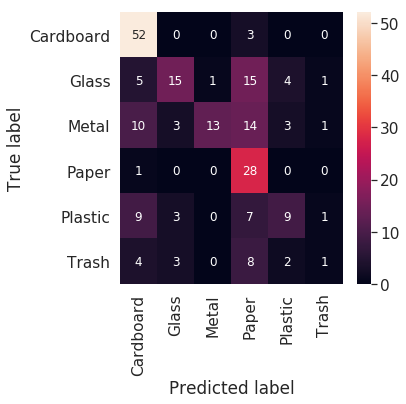

In [9]:
import seaborn as sn
import pandas  as pd
import matplotlib.pyplot as plt

labels = ['Cardboard', 'Glass','Metal','Paper','Plastic','Trash' ]
df_cm = pd.DataFrame(cm, labels,
                  labels)
plt.figure(figsize = (5,5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()